In [1]:
%load_ext autoreload
%autoreload 2
from util import util
import numpy as np

/opt/miniconda2/envs/py36h2o/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# train signals
%store -r signal_1_1_hor
%store -r signal_1_2_hor
%store -r signal_1_1_vert
%store -r signal_1_2_vert

%store -r signal_2_1_hor
%store -r signal_2_2_hor
%store -r signal_2_1_vert
%store -r signal_2_2_vert

%store -r signal_3_1_hor
%store -r signal_3_2_hor
%store -r signal_3_1_vert
%store -r signal_3_2_vert

# test signals
%store -r signal_1_3_hor
%store -r signal_1_4_hor
%store -r signal_1_5_hor
%store -r signal_1_6_hor
%store -r signal_1_7_hor
%store -r signal_1_3_vert
%store -r signal_1_4_vert
%store -r signal_1_5_vert
%store -r signal_1_6_vert
%store -r signal_1_7_vert

%store -r signal_2_3_hor
%store -r signal_2_4_hor
%store -r signal_2_5_hor
%store -r signal_2_6_hor
%store -r signal_2_7_hor
%store -r signal_2_3_vert
%store -r signal_2_4_vert
%store -r signal_2_5_vert
%store -r signal_2_6_vert
%store -r signal_2_7_vert

%store -r signal_3_3_hor
%store -r signal_3_3_vert

hor_train = [signal_1_1_hor, signal_1_2_hor, signal_2_1_hor, signal_2_2_hor, signal_3_1_hor, signal_3_2_hor]
vert_train = [signal_1_1_vert, signal_1_2_vert, signal_2_1_vert, signal_2_2_vert, signal_3_1_vert, signal_3_2_vert]

hor_test = [signal_1_3_hor, signal_1_4_hor, signal_1_5_hor, signal_1_6_hor, signal_1_7_hor,
            signal_2_3_hor, signal_2_4_hor, signal_2_5_hor, signal_2_6_hor, signal_2_7_hor,
            signal_3_3_hor]
vert_test = [signal_1_3_vert, signal_1_4_vert, signal_1_5_vert, signal_1_6_vert, signal_1_7_vert,
             signal_2_3_vert, signal_2_4_vert, signal_2_5_vert, signal_2_6_vert, signal_2_7_vert,
             signal_3_3_vert]

spectros_train_hor = [np.log(util.getSpectro(signal)) for signal in hor_train]
spectros_train_vert = [np.log(util.getSpectro(signal)) for signal in vert_train]

spectros_test_hor = [np.log(util.getSpectro(signal)) for signal in hor_test]
spectros_test_vert = [np.log(util.getSpectro(signal)) for signal in vert_test]

In [3]:
# parameters
expName = 'b123_hor_vert_log'

testspecs = [
    ['1_3', 5730],
    ['1_4', 339],
    ['1_5', 1610],
    ['1_6', 1460],
    ['1_7', 7570],
    ['2_3', 7530],
    ['2_4', 1390],
    ['2_5', 3090],
    ['2_6', 1290],
    ['2_7', 580],
    ['3_3', 820]
]

### bepaal X en Y voor trainen

In [4]:
X_train = np.concatenate((np.concatenate(spectros_train_hor, axis=0),
                          np.concatenate(spectros_train_vert, axis=0)), 
                          axis=1)
print(np.shape(X_train))

Y_train = []
for spectro in spectros_train_hor:
    nr_samples = len(spectro)
    Y_train_nw = np.array([10 * (nr_samples - i) for i in range(1, nr_samples +1)])
    Y_train = np.append(Y_train, Y_train_nw)
    
print(np.shape(Y_train))

(7534, 2562)
(7534,)


## train modellen

In [5]:
layersizes = [600,300,150,25]
epochss = [50, 100, 200, 500]
epochss = [100, 150]

Epoch 1/100
7534/7534 [==============================] - 15s 2ms/step - loss: 50826672.5458
Epoch 2/100
7534/7534 [==============================] - 14s 2ms/step - loss: 21195346.9062
Epoch 3/100
7534/7534 [==============================] - 14s 2ms/step - loss: 8749924.7903
Epoch 4/100
7534/7534 [==============================] - 14s 2ms/step - loss: 7029350.2341
Epoch 5/100
7534/7534 [==============================] - 14s 2ms/step - loss: 6098492.1349
Epoch 6/100
7534/7534 [==============================] - 14s 2ms/step - loss: 5532505.8435
Epoch 7/100
7534/7534 [==============================] - 14s 2ms/step - loss: 5088806.5496
Epoch 8/100
7534/7534 [==============================] - 14s 2ms/step - loss: 5420111.9324
Epoch 9/100
7534/7534 [==============================] - 14s 2ms/step - loss: 4692410.1307
Epoch 10/100
7534/7534 [==============================] - 14s 2ms/step - loss: 4166909.0214
Epoch 11/100
7534/7534 [==============================] - 14s 2ms/step - loss: 4218789.

7534/7534 [==============================] - 11s 1ms/step - loss: 461061.5635
Epoch 96/100
7534/7534 [==============================] - 11s 1ms/step - loss: 1220959.6054
Epoch 97/100
7534/7534 [==============================] - 11s 1ms/step - loss: 664286.5051
Epoch 98/100
7534/7534 [==============================] - 11s 1ms/step - loss: 518233.2078
Epoch 99/100
7534/7534 [==============================] - 11s 1ms/step - loss: 486390.2939
Epoch 100/100
7534/7534 [==============================] - 11s 2ms/step - loss: 585726.0437


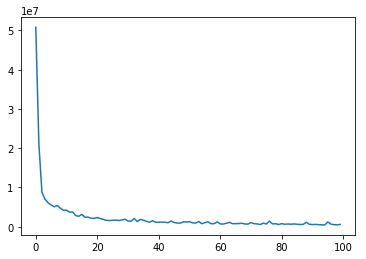

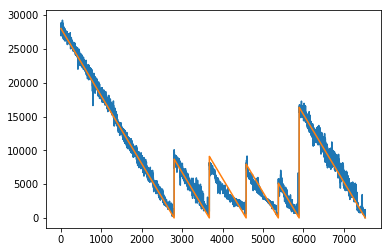

Epoch 1/150
7534/7534 [==============================] - 13s 2ms/step - loss: 49336340.7417
Epoch 2/150
7534/7534 [==============================] - 11s 2ms/step - loss: 19283046.1781
Epoch 3/150
7534/7534 [==============================] - 11s 1ms/step - loss: 9813955.8640
Epoch 4/150
7534/7534 [==============================] - 11s 2ms/step - loss: 6946347.5458
Epoch 5/150
7534/7534 [==============================] - 11s 1ms/step - loss: 6484947.6260
Epoch 6/150
7534/7534 [==============================] - 12s 2ms/step - loss: 5617283.4202
Epoch 7/150
7534/7534 [==============================] - 12s 2ms/step - loss: 3004761.1810
Epoch 15/150
7534/7534 [==============================] - 11s 2ms/step - loss: 2721496.3847
Epoch 16/150
7534/7534 [==============================] - 11s 2ms/step - loss: 3028893.7196
Epoch 17/150
7534/7534 [==============================] - 11s 2ms/step - loss: 2295781.2654
Epoch 18/150
7534/7534 [==============================] - 11s 1ms/step - loss: 295495

7534/7534 [==============================] - 11s 1ms/step - loss: 545007.9620
Epoch 97/150
7534/7534 [==============================] - 11s 1ms/step - loss: 537777.2919
Epoch 98/150
7534/7534 [==============================] - 11s 1ms/step - loss: 614976.8837
Epoch 99/150
7534/7534 [==============================] - 11s 1ms/step - loss: 728008.3110
Epoch 100/150
7534/7534 [==============================] - 11s 1ms/step - loss: 510954.2432
Epoch 101/150
7534/7534 [==============================] - 11s 1ms/step - loss: 650583.2757
Epoch 102/150
7534/7534 [==============================] - 11s 1ms/step - loss: 869868.0194
Epoch 103/150
7534/7534 [==============================] - 11s 1ms/step - loss: 1037674.2605
Epoch 104/150
7534/7534 [==============================] - 11s 1ms/step - loss: 626818.4950
Epoch 105/150
7534/7534 [==============================] - 11s 1ms/step - loss: 567750.5618
Epoch 106/150
7534/7534 [==============================] - 11s 1ms/step - loss: 2254471.8788
Epo

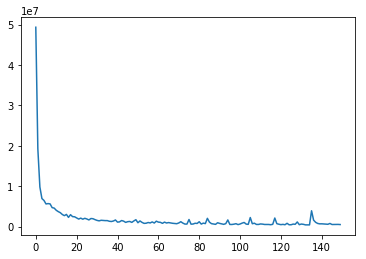

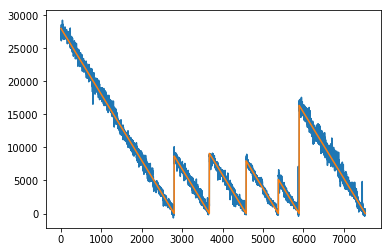

In [6]:
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

## test modellen

##################
# Test: 1_3
##################
1802/1802 [==============================] - 1s 368us/step


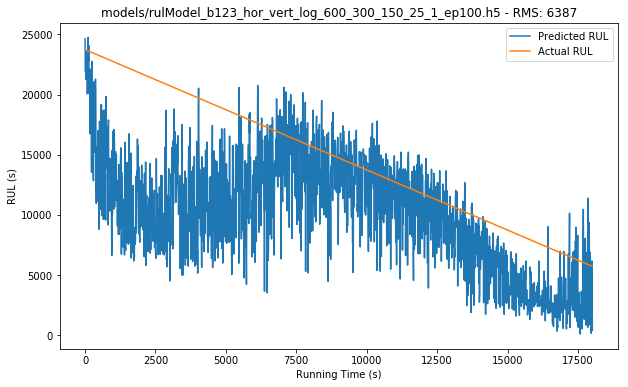

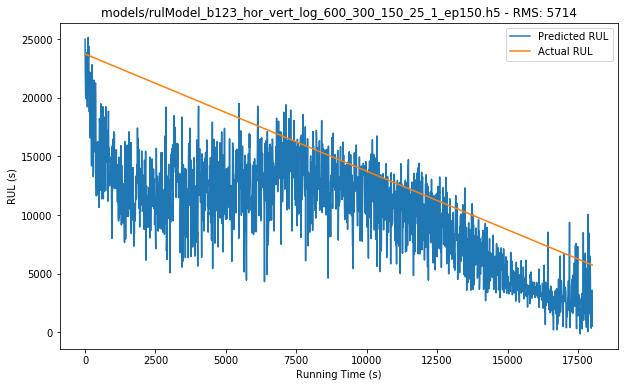

##################
# Test: 1_4
##################
1139/1139 [==============================] - 1s 457us/step


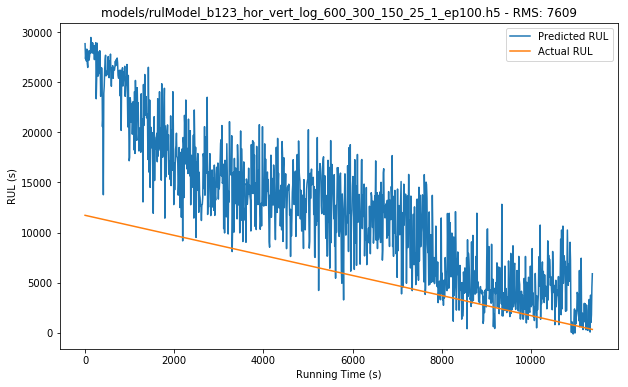

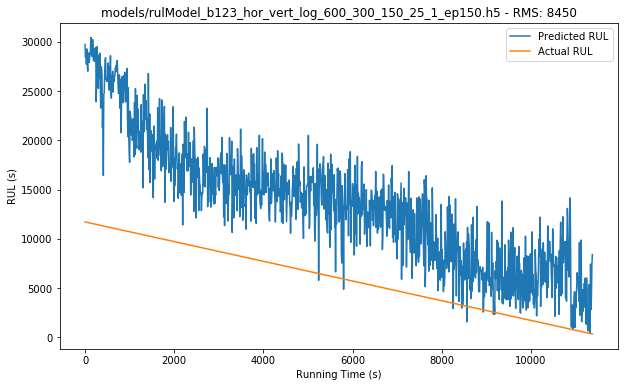

##################
# Test: 1_5
##################
2302/2302 [==============================] - 1s 381us/step


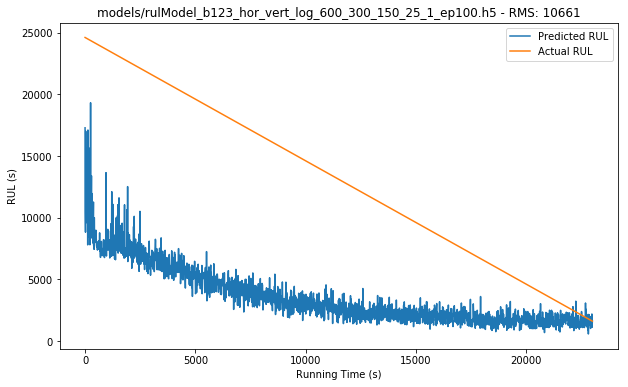

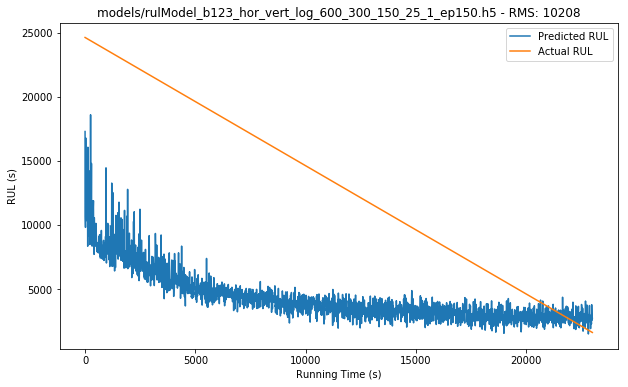

##################
# Test: 1_6
##################
2302/2302 [==============================] - 1s 397us/step


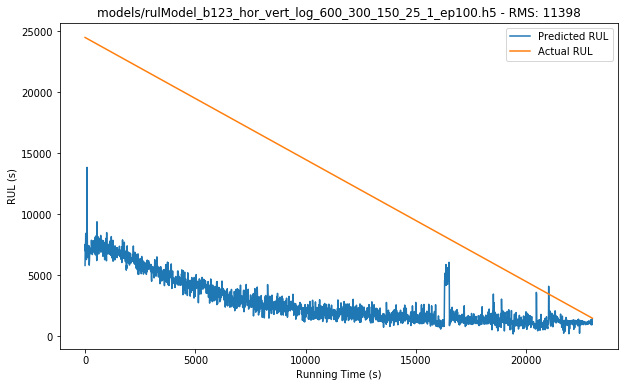

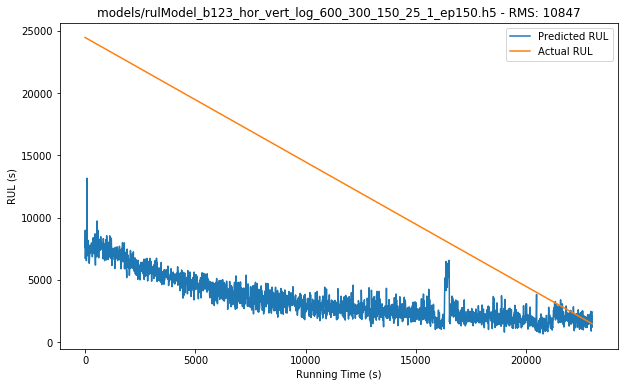

##################
# Test: 1_7
##################
1502/1502 [==============================] - 1s 592us/step


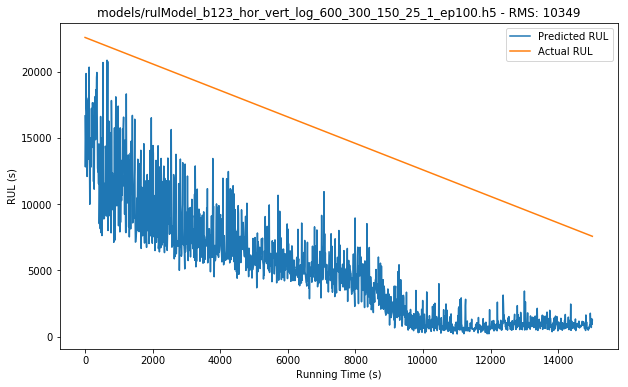

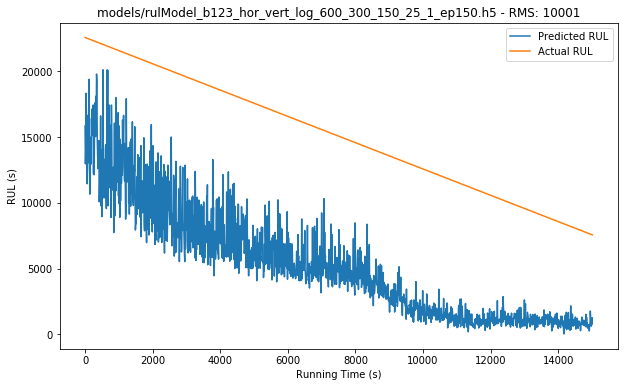

##################
# Test: 2_3
##################
1202/1202 [==============================] - 1s 688us/step


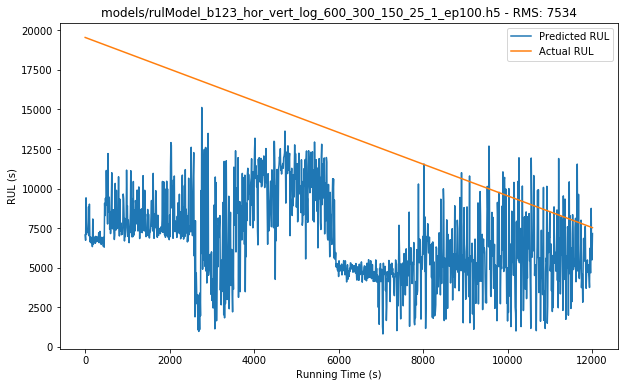

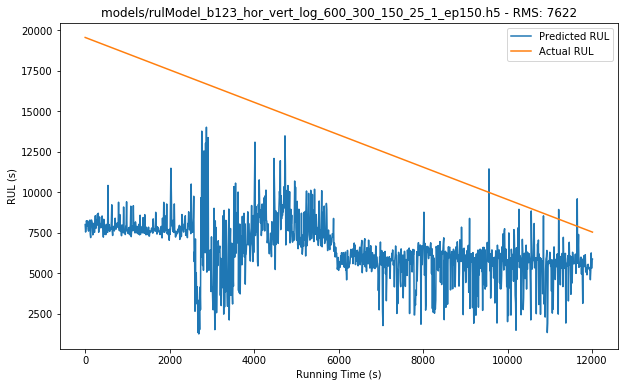

##################
# Test: 2_4
##################
612/612 [==============================] - 1s 1ms/step


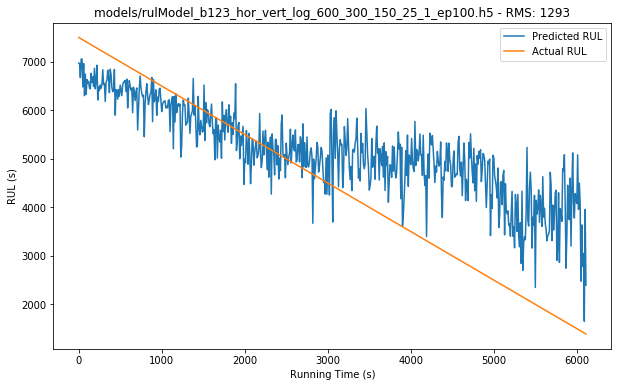

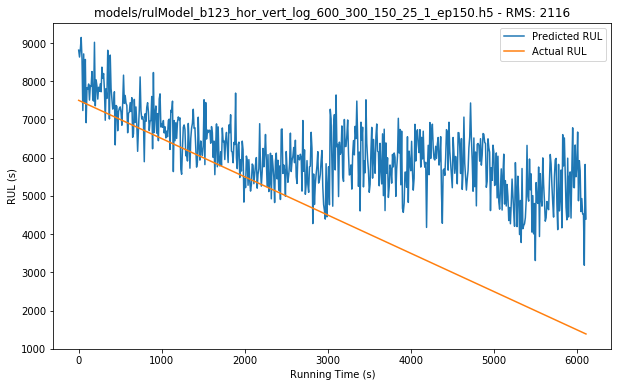

##################
# Test: 2_5
##################
2002/2002 [==============================] - 1s 602us/step


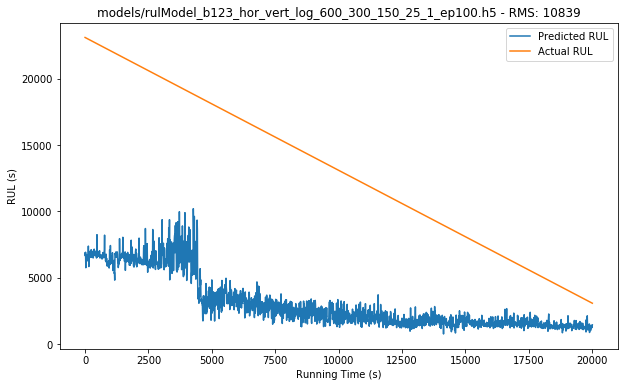

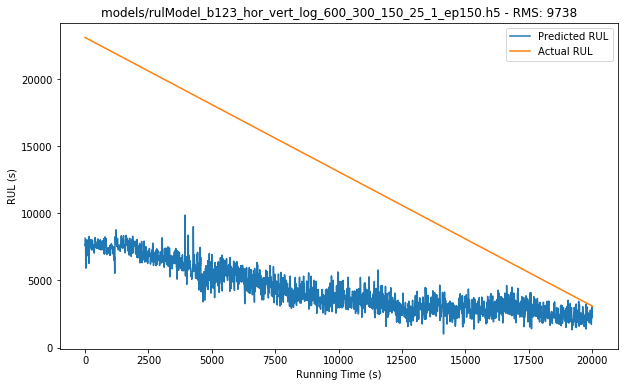

##################
# Test: 2_6
##################
572/572 [==============================] - 1s 2ms/step


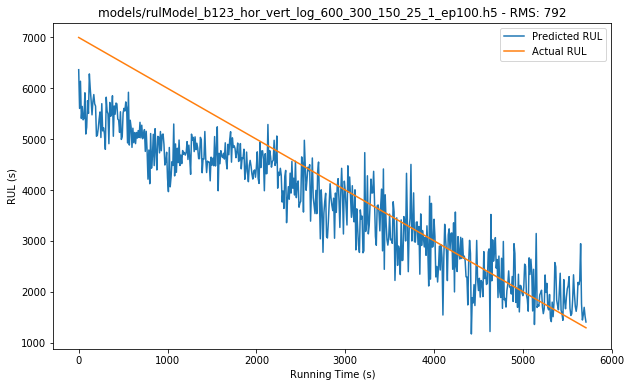

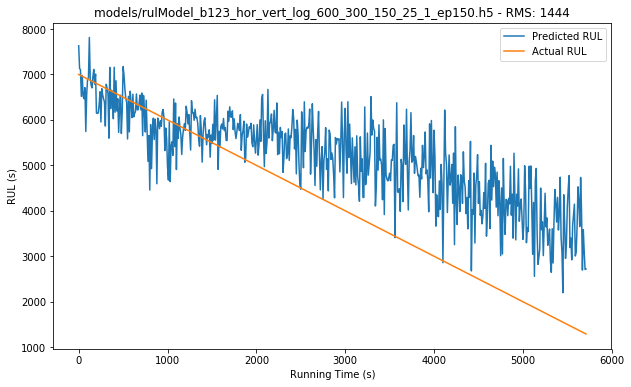

##################
# Test: 2_7
##################
172/172 [==============================] - 1s 6ms/step


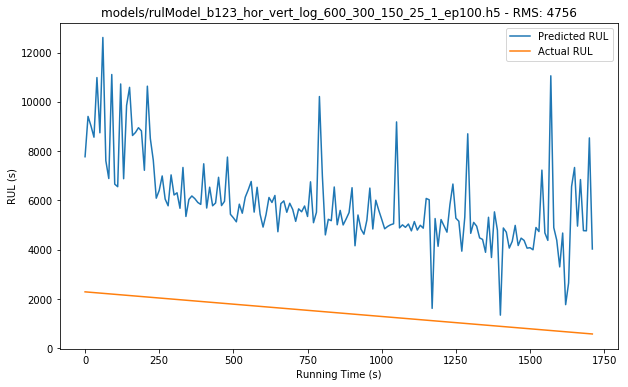

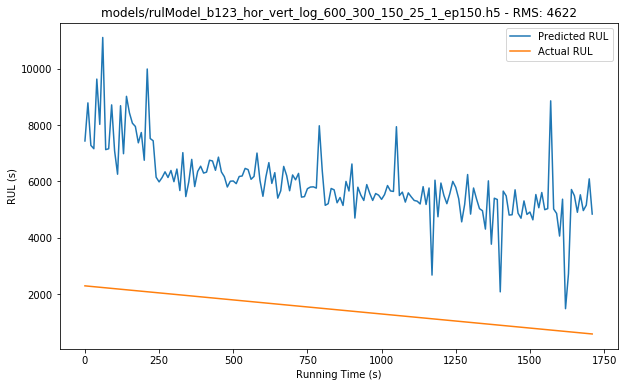

##################
# Test: 3_3
##################
352/352 [==============================] - 1s 3ms/step


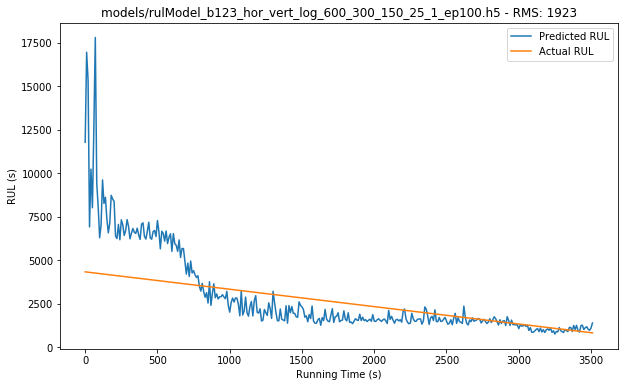

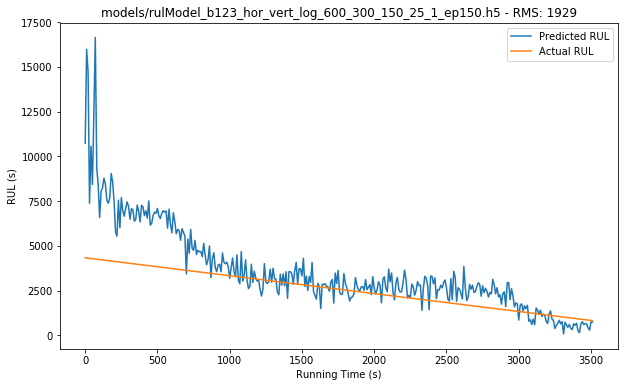

In [7]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)